<a href="https://colab.research.google.com/github/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_03_Wayne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #03
### Interpretable ML
Instructions
Instructions
In this assignment, you will work with a dataset from a telecommunications company (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code). The company is interested in understanding the factors that contribute to customer churn (customers leaving the company for a competitor) and developing interpretable models to predict which customers are at risk of churning.



Tasks

Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.
Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.
Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.
Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.
Model Comparison: Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.
### Wayne Yang
#### https://github.com/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_03_Wayne.ipynb

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Trip1ewhy/Duke_xAI_Wayne/blob/51290060b5f29826b761f848f38d9514156082ce/Assignment%20%2302.ipynb)

# Setup #

In [1]:
!rm -r ./sample_data

In [2]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data


# Clone GitHub files to colab workspace
repo_name = "Duke_xAI_Wayne" # Change to your repo name
git_path = 'https://github.com/Trip1ewhy/Duke_xAI_Wayne.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment #02_Wayne'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke_xAI_Wayne'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 105 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (105/105), 34.34 MiB | 10.34 MiB/s, done.
Resolving deltas: 100% (28/28), done.
[Errno 2] No such file or directory: 'Duke_xAI_Wayne/Assignment #02_Wayne'
/content
Duke_xAI_Wayne/


In [233]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [270]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pygam import LogisticGAM, s, f
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder


# Exploratory Data Analysis to check Assumptions: #

In [237]:
# Load dataset
df = pd.read_csv('/content/Duke_xAI_Wayne/Assignment #03/customer_data.csv')
#clean dataset
df.replace(' ', np.nan, inplace=True)
df = df.dropna()
# Display first few rows of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [33]:
# Summary statistics for numerical columns
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Checking the distribution of churn (target variable)
print(df['Churn'].value_counts())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64


## numerical_features ##

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


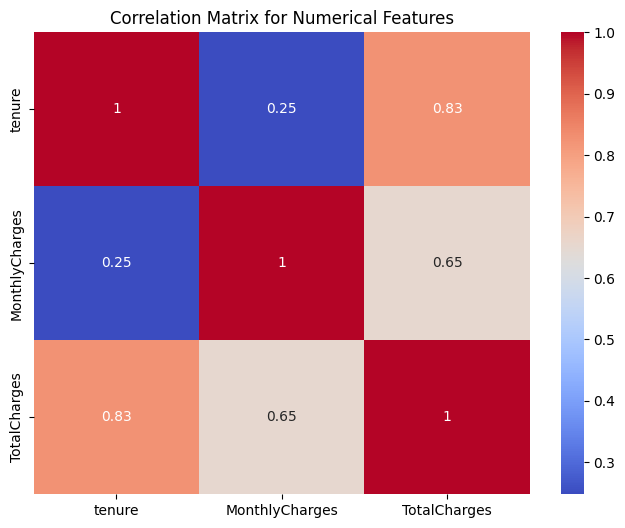

In [34]:
# Selecting numerical columns for correlation matrix
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Correlation matrix
#
# Convert TotalCharges to numeric, forcing invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
corr_matrix = df[numerical_features].corr()
# Now, check again for missing values in the dataset
print(df.isnull().sum())


# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


tenure vs TotalCharges: Strong positive correlation (0.83), indicating that customers with longer tenures tend to have higher total charges.

tenure vs MonthlyCharges: Weak correlation (0.25), suggesting that monthly charges don't significantly increase with tenure.

MonthlyCharges vs TotalCharges: Moderate positive correlation (0.65), meaning higher monthly charges generally lead to higher total charges.

In summary, TotalCharges strongly correlates with both tenure and MonthlyCharges, while tenure and MonthlyCharges have a weaker relationship.

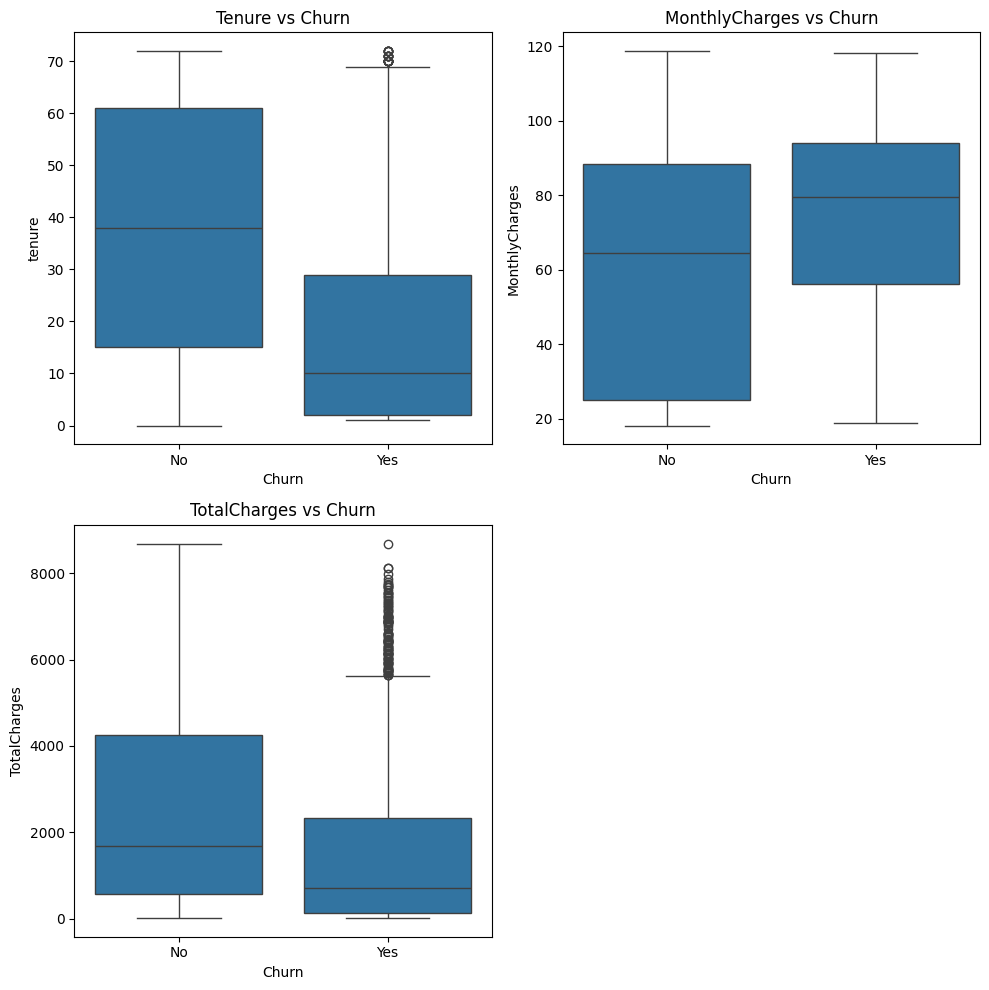

In [35]:
# Plotting boxplots for tenure, MonthlyCharges and TotalCharges against Churn
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')

plt.subplot(2, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')

plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')


plt.tight_layout()
plt.show()


Tenure vs Churn: Customers who did not churn generally have much higher tenures, with a median around 50 months. Customers who churned tend to have significantly lower tenures, with a median under 10 months. This suggests that long-term customers are less likely to churn.

MonthlyCharges vs Churn: Customers who churn tend to have slightly higher monthly charges compared to those who did not churn, although the difference is not as pronounced as tenure.

TotalCharges vs Churn: Non-churning customers tend to have higher total charges due to longer tenures, while churned customers have lower total charges with some outliers, indicating a pattern of shorter service duration before churning.

In summary, tenure seems to be the most significant factor associated with churn, while monthly and total charges also show some differentiation between churned and non-churned customers.

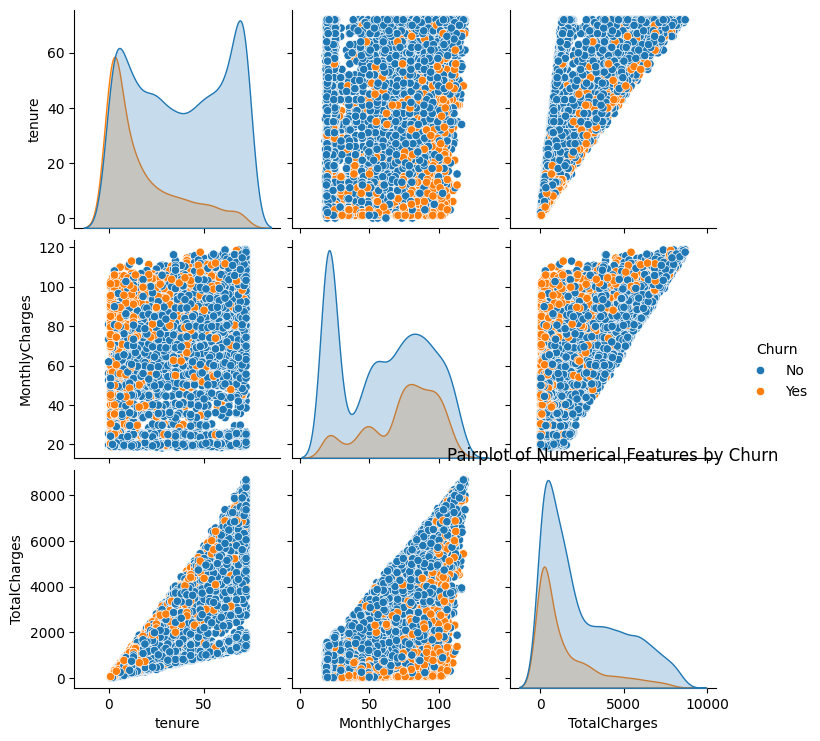

In [36]:
# Scatter plot to check for linear relationships
sns.pairplot(df, vars=numerical_features, hue='Churn')
plt.title('Pairplot of Numerical Features by Churn')
plt.show()


Linear regression assumptions are not well-supported, as the relationships are not linear, particularly for tenure and TotalCharges.

Logistic regression can manage the binary nature of Churn, but the relationships are not perfectly linear in log-odds terms, so it may struggle with fitting tenure and TotalCharges well.

GAM is the most flexible model and can handle the clear non-linear relationships observed between features like tenure and churn, making it the best-suited model for capturing these patterns.


## non-numerical_features ##

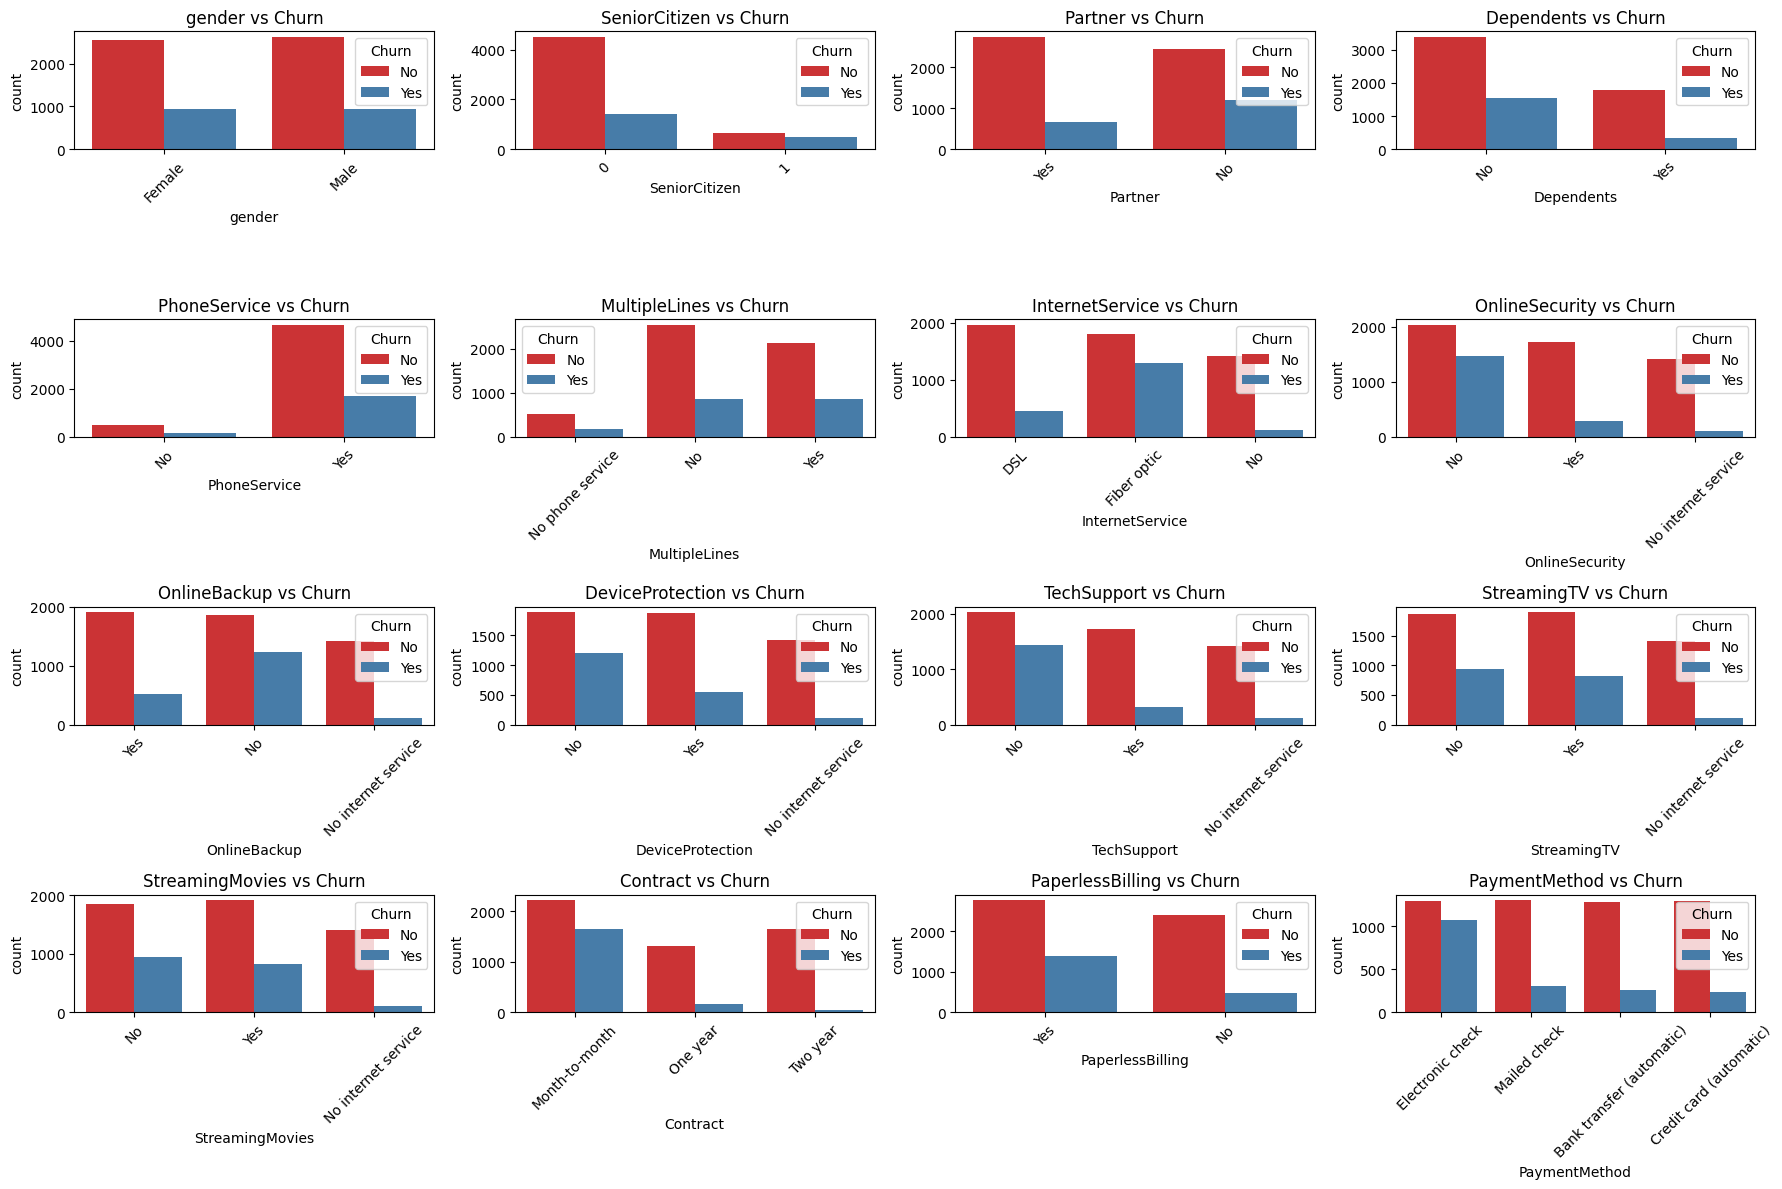

In [37]:
# Set up the figure for subplots
plt.figure(figsize=(18, 12))

# Create a list of categorical columns to visualize
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots for each categorical variable against Churn
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue='Churn', data=df, palette='Set1')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


This series of count plots visualizes the relationship between various categorical features and the target variable `Churn`. Here’s an analysis based on the observed trends:

### Key Observations:

1. **Gender vs Churn**:
   - The distribution of churn seems relatively balanced between males and females. Gender does not appear to be a significant indicator of churn.

2. **SeniorCitizen vs Churn**:
   - Senior citizens (category `1`) have a higher churn rate compared to non-senior citizens. Being a senior may be a factor influencing churn.

3. **Partner vs Churn**:
   - Customers without partners tend to churn more frequently. This suggests that customers with partners may have higher loyalty or are less likely to churn.

4. **Dependents vs Churn**:
   - Customers with dependents churn less often than those without dependents, indicating that having dependents could be associated with longer customer tenure and less churn.

5. **PhoneService vs Churn**:
   - The churn rate is much lower among customers without phone service. For customers with phone service, the churn rate is more balanced.

6. **MultipleLines vs Churn**:
   - Customers who have "No phone service" rarely churn, while those with multiple lines (`Yes`) seem to churn at higher rates compared to those with only one line (`No`).

7. **InternetService vs Churn**:
   - Fiber optic customers churn significantly more than DSL customers. This could indicate dissatisfaction or competition in the fiber optic segment.

8. **OnlineSecurity vs Churn**:
   - Customers without online security services are more likely to churn, while those with online security have lower churn rates.

9. **OnlineBackup vs Churn**:
   - The pattern here is similar to online security: customers with no online backup service are more likely to churn than those who have it.

10. **DeviceProtection vs Churn**:
    - The churn rate is higher for customers without device protection. Device protection seems to be a factor associated with customer retention.

11. **TechSupport vs Churn**:
    - Customers without tech support services churn more frequently. Offering tech support may contribute to customer retention.

12. **StreamingTV and StreamingMovies vs Churn**:
    - The churn rate is higher for customers without streaming services. It could indicate that customers with more bundled services (such as TV and movies) are more likely to stay.

13. **Contract vs Churn**:
    - Customers on a month-to-month contract churn significantly more than those on one- or two-year contracts. Long-term contracts appear to reduce churn.

14. **PaperlessBilling vs Churn**:
    - Customers with paperless billing tend to churn more than those with traditional billing. This may suggest that paperless billing correlates with more transient customers.

15. **PaymentMethod vs Churn**:
    - Customers using electronic checks have the highest churn rate, while those using bank transfers or credit cards churn less. Payment methods may be indicative of churn tendencies.

### Model Implications:
- **Linear Regression**: Many of these relationships do not seem linear. For example, the churn distribution by `Contract` is distinctly non-linear, making it unsuitable for linear regression.
  
- **Logistic Regression**: Many features, such as `Contract` and `PaymentMethod`, show strong distinctions between churn categories, suggesting that logistic regression could perform well in separating customers based on these features.

- **GAM (Generalized Additive Model)**: The non-linear relationships between churn and features like `InternetService`, `TechSupport`, and `Contract` would be well-handled by GAM. The model could capture more complex, non-linear effects that logistic or linear regression might miss.

### Conclusion:
Features like `Contract`, `InternetService`, and `PaymentMethod` have the strongest relationships with churn and should be prioritized for modeling. Logistic regression could work well given the clear categorical separations, but GAM would likely provide the most flexibility to capture more complex, non-linear relationships.

(Analysis primaryly given by ChatGPT, edited by Wayne)

## 1. Linear Regression: ##
Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.

In this section, I will treat "churn" as a continuous variable and use all features except "customer ID" as independent variables for linear regression. Each categorical feature will be encoded, and 80% of the dataset will be used as the training set to calculate the coefficient of each feature. The remaining 20% of the dataset will be used as the test set to evaluate the trained linear regression model.

In [147]:
# A new df
#df_linear = df.copy()

In [148]:
# # Convert 'Churn' to numeric (0 for No, 1 for Yes)
# #df_linear['Churn'] = df_linear['Churn'].map({'No': 0, 'Yes': 1})

# # Now check the first few rows to confirm the change
# #print(df_linear[['Churn']].head())
# # Feature selection
# #X = df_linear[['tenure', 'MonthlyCharges', 'TotalCharges']]

# # Target variable: Churn
# #y = df_linear['Churn']
# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Linear Regression model
# lin_reg = LinearRegression()

# # Fit the model on the training data
# lin_reg.fit(X_train, y_train)

# # Predict on the test set
# y_pred = lin_reg.predict(X_test)
# # Display the coefficients
# coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
# print(coefficients)
# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(X.head(0))
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'R-squared: {r2}')


   Churn
0      0
1      0
2      1
3      0
4      1


In [226]:

# Exclude 'customerID' as it's not a useful feature for prediction
df_linear = df.drop(columns=['customerID'])
df_linear['Churn'] = df_linear['Churn'].map({'No': 0, 'Yes': 1})
# Select the features and target
X = df_linear.drop(columns=['Churn'])
y = df_linear['Churn']

# Identify categorical columns for one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Identify numerical columns (columns that should pass through without encoding)
numerical_columns = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessing pipeline for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns)
    ], remainder='passthrough')  # Ensure numerical features are passed through unchanged

# Set up the logistic regression pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Split the data into training and test sets (for larger datasets, not necessary with 3 rows)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Extract the LogisticRegression model from the pipeline
log_reg = model_pipeline.named_steps['model']

# Get the feature names after preprocessing (OneHotEncoder creates new feature names)
encoded_columns = model_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)
feature_names = list(encoded_columns) + numerical_columns  # Combine encoded and numerical features
print("input features:")
print(X.head(0))
# Display the coefficients
coefficients_log = pd.DataFrame(log_reg.coef_.flatten(), index=feature_names, columns=['Coefficient'])
print(coefficients_log)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)
#print(y_test)
#print(y_pred)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(X.head(0))
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')



input features:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []
                                Coefficient
gender_Male                       -0.015981
Partner_Yes                       -0.029351
Dependents_Yes                    -0.160254
PhoneService_Yes                  -0.310497
MultipleLines_No phone service    -0.093635
...                                     ...
TotalCharges_996.95               -0.009812
TotalCharges_997.65                0.103023
SeniorCitizen                      0.288121
tenure                            -0.030022
MonthlyCharges                     0.002476

[3401 rows x 1 columns]
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSec

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Quantify 'Yes' and 'No', so that linear regression can compute F1

In [229]:
#print(y_pred)
y_pred_numerical = [1 if prob > 0.5 else 0 for prob in y_pred]
# Evaluate the model with F1, precision, recall, etc.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.802901023890785
Precision: 0.6610608020698577
Recall: 0.5424628450106157
F1 Score: 0.5959183673469389


## 2. Logistic Regression ##
Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.

In this section, I will treat "churn" as a binary variable and use all features except "customer ID" as independent variables for logistic regression. Each categorical feature will be encoded, and 80% of the dataset will be used as the training set to calculate the coefficient of each feature. The remaining 20% of the dataset will be used as the test set to evaluate the trained logistic regression model.

In [230]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [231]:
# Remove 'customerID' as it is not useful for prediction
df_logistic = df.drop(columns=['customerID'])
df_logistic.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [232]:


# Separate the features and target variable
X = df_logistic.drop(columns=['Churn'])
y = df_logistic['Churn']

# Identify categorical columns for one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Identify numerical columns (columns that should pass through without encoding)
numerical_columns = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessing pipeline for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns)
    ], remainder='passthrough')  # Ensure numerical features are passed through unchanged

# Set up the logistic regression pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Split the data into training and test sets (for larger datasets, not necessary with 3 rows)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Extract the LogisticRegression model from the pipeline
log_reg = model_pipeline.named_steps['model']

# Get the feature names after preprocessing (OneHotEncoder creates new feature names)
encoded_columns = model_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)
feature_names = list(encoded_columns) + numerical_columns  # Combine encoded and numerical features
print("input features:")
print(X.head(0))
# Display the coefficients
coefficients_log = pd.DataFrame(log_reg.coef_.flatten(), index=feature_names, columns=['Coefficient'])
print(coefficients_log)

# Optional: Evaluate the model
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


input features:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []
                                Coefficient
gender_Male                       -0.015981
Partner_Yes                       -0.029351
Dependents_Yes                    -0.160254
PhoneService_Yes                  -0.310497
MultipleLines_No phone service    -0.093635
...                                     ...
TotalCharges_996.95               -0.009812
TotalCharges_997.65                0.103023
SeniorCitizen                      0.288121
tenure                            -0.030022
MonthlyCharges                     0.002476

[3401 rows x 1 columns]
Accuracy: 0.802901023890785
Precision: 0.6610608020698577
Recall: 0.5424628450106157
F1 Score: 0.5959183673469389


## 3. Generalized Additive Model (GAM) ##
Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.


In this section, I will treat "churn" as a binary variable and use all features except "customer ID" as independent variables for the GAM model. Each categorical feature will be encoded, and 80% of the dataset will be used as the training set to calculate the coefficient of each feature. The remaining 20% of the dataset will be used as the test set to evaluate the performance of the trained GAM model.

In [277]:
# Exclude 'customerID' as it's not a useful feature for prediction
df_GAM = df.drop(columns=['customerID'])
#df_GAM['Churn'] = df_linear['Churn'].map({'No': 0, 'Yes': 1})


label_encoders = {}
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    le = LabelEncoder()
    df_GAM[column] = le.fit_transform(df_GAM[column])
    label_encoders[column] = le


# Select the features and target
X = df_GAM.drop(columns=['Churn'])
y = df_GAM['Churn']


# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create and fit the GAM model, including all features
gam = LogisticGAM(
    s(4) + s(17) + s(18) + # Smooth functions for continuous variables
    f(0) + f(1) + f(2) + f(3) + f(5) + # Factor functions for categorical variables
    f(6) + f(7) + f(8) + f(9) + f(10) + f(11) + f(12) + f(13) + f(14) + f(15)+ f(16)
)
# Fit the model
gam.fit(X_train, y_train)

# predict
y_pred = gam.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Print the model coefficients
print("\nModel Coefficients:")
print(gam.coef_)

Accuracy: 0.7974
Precision: 0.6540
Recall: 0.5053
F1 Score: 0.5701
Mean Squared Error (MSE): 0.2026
R-squared: -0.0379

Model Coefficients:
[ 3.97089306  1.76630688  0.92539668  0.67419191  0.40339211  0.18715977
 -0.05625795 -0.36064184 -0.58172986 -0.41094624 -0.05955923 -0.36450895
 -0.22114563 -0.2922124  -0.39110331 -0.85180583 -1.19496744 -0.53404901
 -1.53239218 -3.32843483  2.73164062  1.67796432  0.80350512  0.82161332
  0.91679111  0.63427034  0.34377493  0.45729322 -0.03470363 -0.55210456
 -0.4650522  -0.55515338 -0.45209476 -1.1421185  -1.12615527 -0.79904491
 -1.07401338 -1.44173669 -1.50626457 -1.49082571  0.18204772 -0.26154396
 -0.50665983  0.08814723 -0.23121386 -0.27800102  0.41909841  0.19463026
 -0.5999574  -0.6048493  -0.22813308 -0.24371593 -0.27740723 -0.00443786
 -0.20782445 -0.39395524  0.03536224 -0.05053552  0.15564082  0.56089343
  0.01146037 -0.01146043 -0.14392918  0.14392913 -0.05271915  0.0527191
  0.0942134  -0.09421345 -0.097137    0.09713694 -0.192837

# Model Comparison: #
Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.


1. Linear Regression
Performance:
Accuracy: 0.8029
Precision: 0.6611
Recall: 0.5425
F1 Score: 0.5959
Mean Squared Error (MSE): 0.1971
R-squared: -0.0049

Strengths:
Simplicity and Interpretability: The coefficients in linear regression can be directly interpreted, making it easy to understand how each feature influences the target variable (Churn).
Stable Performance: It shows reasonable performance with an F1 score of around 0.60, balancing precision and recall adequately.

Weaknesses:
Not Ideal for Classification: Linear regression is meant for continuous target variables, making it less suited for binary classification problems like customer churn prediction.
Negative R-squared: A negative R-squared indicates that the model fits the data poorly, suggesting that linear regression might not capture the underlying patterns well, even if the other metrics are acceptable.
Suitable Use Case:
Linear regression could be used if the company values model interpretability over classification performance. However, it’s not the best fit for this binary classification task.


2. Logistic Regression
Performance:
Accuracy: 0.8029
Precision: 0.6611
Recall: 0.5425
F1 Score: 0.5959

Strengths:
Designed for Classification: Logistic regression is a proper model for binary classification problems, providing probabilities and handling the two-class problem effectively.
High Interpretability: Similar to linear regression, the coefficients in logistic regression offer insights into how features impact the likelihood of churn, making it easy to explain to stakeholders.
Reliable Performance: The model performs well, and since it is suited for classification, it is more trustworthy for this specific problem than linear regression.

Weaknesses:
Limited to Linear Relationships: Logistic regression assumes a linear relationship between features and the log-odds of the target, so it might not perform well if the data contains complex, non-linear patterns.
Suitable Use Case:
Logistic regression is a great choice for predicting customer churn. It balances good performance and interpretability, making it ideal for most business scenarios where explanations and insights into feature contributions are required.


3. Generalized Additive Model (GAM)
Performance:
Accuracy: 0.7974
Precision: 0.6540
Recall: 0.5053
F1 Score: 0.5701
Mean Squared Error (MSE): 0.2026
R-squared: -0.0379

Strengths:
Captures Non-Linear Relationships: GAMs can model non-linear relationships between features and the target variable using smoothing functions, making it more flexible than logistic or linear regression for handling complex patterns.
Interpretability: While it captures non-linear patterns, GAM still offers interpretable outputs, allowing for an understanding of which features have a greater influence on churn and their behavior.

Weaknesses:
Slightly Lower Performance: Compared to logistic regression, GAM has slightly lower accuracy, precision, recall, and F1 scores, especially in terms of recall and F1 score, which could indicate a lower ability to detect churned customers.
Increased Complexity: GAM is more complex to tune and requires more computational resources than logistic regression or linear regression, which could be a drawback for deployment.
Suitable Use Case:
GAM is a good choice when the company expects that non-linear relationships exist in the data and wants a more sophisticated model to capture these patterns. However, it may require more tuning and computational resources.


##Recommendation:##
Logistic Regression: If the company needs a reliable, interpretable, and easy-to-implement model, logistic regression is the best option. It provides a solid balance of accuracy, interpretability, and business relevance.

Generalized Additive Model (GAM): For more advanced use cases, like much more features, where the company suspects there are non-linear relationships driving churn, GAM is worth considering, especially if there’s room for tuning and resource investment.